# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [3]:
# Create the DataFrame
student_data = pd.DataFrame({'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30],
                              'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})

# Display the DataFrame
print(student_data)

   Age  Tardies
0   17       10
1   51        1
2   27        5
3   21        9
4   36        4
5   48        2
6   19        9
7   26        6
8   54        0
9   30        3


Draw a dispersion diagram (scatter plot) for the data.

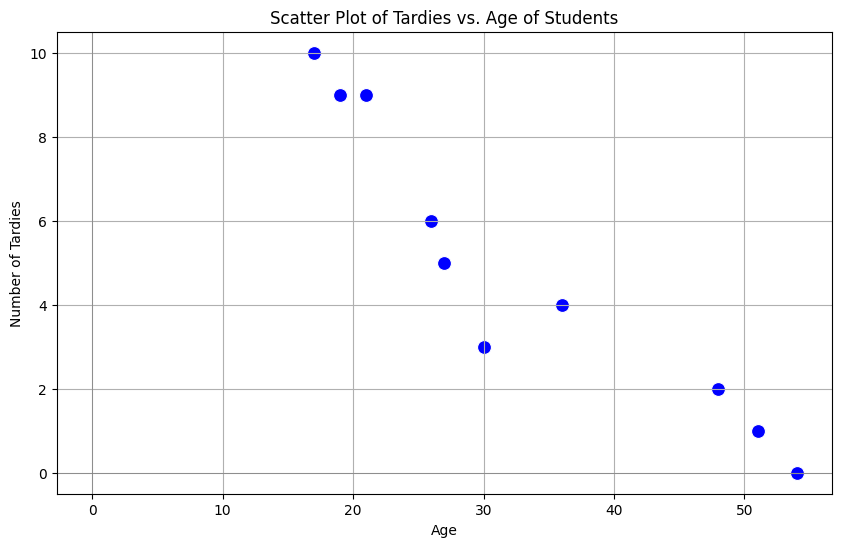

In [4]:
# Visualize the relationship using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=student_data, x='Age', y='Tardies', color='blue', s=100)  # 's' controls the size of the points
plt.title('Scatter Plot of Tardies vs. Age of Students')
plt.xlabel('Age')
plt.ylabel('Number of Tardies')
plt.axhline(0, color='grey', lw=0.5)  # Optional: horizontal line at y=0
plt.axvline(0, color='grey', lw=0.5)  # Optional: vertical line at x=0
plt.grid()
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

**Answer:** While younger students (particularly those in their late teens) have a higher number of tardies, the older students (especially those in their 50s) tend to have very few or no tardies. Based on these observations, you might consider the following hypotheses:

- Age and Responsibility: Younger students may be less responsible or have less structured schedules compared to older students, leading to higher tardiness. As students grow older, they might develop better time-management skills and a greater sense of responsibility.

- Life Circumstances: Older students may have more life experience and potentially different priorities (e.g., work, family commitments) that motivate them to be punctual. Conversely, younger students might be in a transitional phase (e.g., moving from high school to adulthood) where punctuality is less prioritized.

- External Factors: Other factors (not captured in the dataset) might influence tardiness, such as transportation issues, class schedules, or personal motivations. Younger students might also have different social dynamics that could lead to increased tardiness.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:
# Calculate covariance
covariance = student_data['Age'].cov(student_data['Tardies'])

# Calculate correlation
correlation = student_data['Age'].corr(student_data['Tardies'])

# Print the results
print(f"Covariance: {covariance}")
print(f"Correlation: {correlation}")

Covariance: -45.56666666666666
Correlation: -0.9391626886887122


**Comments:**

Covariance measures the degree to which two variables change together. A positive covariance indicates that as one variable increases, the other tends to increase as well. Conversely, a negative covariance indicates that as one variable increases, the other tends to decrease. However, covariance is not standardized and its value is affected by the scale of the variables, making it difficult to interpret.

Correlation, on the other hand, is a standardized measure of the strength and direction of the linear relationship between two variables, ranging from -1 to 1. A correlation of 1 indicates a perfect positive linear relationship, -1 indicates a perfect negative linear relationship, and 0 indicates no linear relationship.

In this case, if the covariance is negative and the correlation is also negative, it would suggest that as Age increases, Tardies tend to decrease, consistent with the trend observed in the scatter plot. The magnitude of the correlation will provide insight into the strength of this relationship.

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [6]:
# Define the outcome variable (dependent variable) and the predictor variable (independent variable)
X = student_data['Age']  # Predictor variable
y = student_data['Tardies']  # Outcome variable

# Add a constant to the independent variable for the regression model
X_with_const = sm.add_constant(X)

# Build the linear regression model
model = sm.OLS(y, X_with_const).fit()

# Print the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Sun, 06 Oct 2024   Prob (F-statistic):           5.57e-05
Time:                        01:30:28   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.0

c:\Users\falabella\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


**Comments:**

The outcome variable in this regression model is the number of Tardies, which we are trying to predict based on the Age of the students.

We are using Ordinary Least Squares (OLS) linear regression, which is a method for estimating the parameters in a linear regression model.

This model assumes a linear relationship between the predictor variable (Age) and the outcome variable (Tardies).

The regression results will provide coefficients, p-values, R-squared values, and other statistics that help us understand the relationship and the model's performance.

Plot your regression model on your scatter plot.

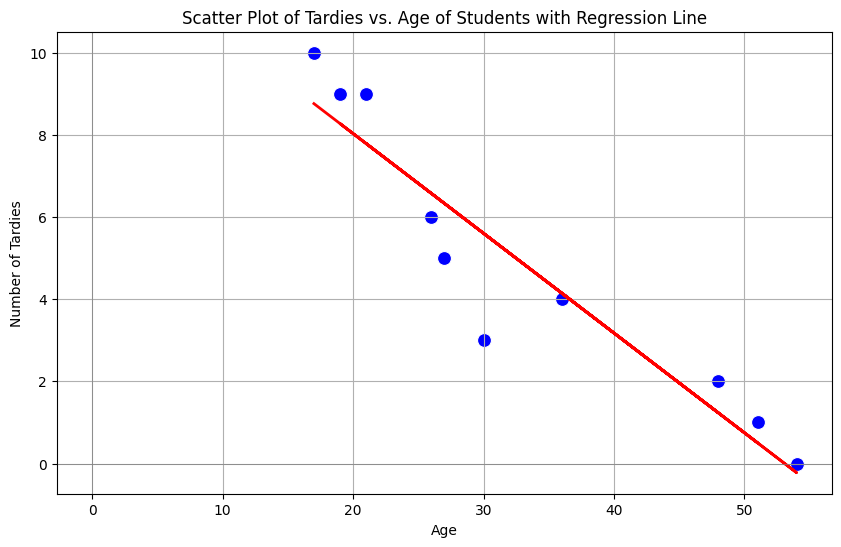

In [7]:
# Define the predictor variable (independent variable) and outcome variable (dependent variable)
X = student_data['Age']  # Predictor variable
y = student_data['Tardies']  # Outcome variable

# Add a constant to the independent variable for the regression model
X_with_const = sm.add_constant(X)

# Build the linear regression model
model = sm.OLS(y, X_with_const).fit()

# Generate predictions for the regression line
predictions = model.predict(X_with_const)

# Plot the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=student_data, x='Age', y='Tardies', color='blue', s=100)  # Scatter plot
plt.plot(student_data['Age'], predictions, color='red', linewidth=2)  # Regression line
plt.title('Scatter Plot of Tardies vs. Age of Students with Regression Line')
plt.xlabel('Age')
plt.ylabel('Number of Tardies')
plt.axhline(0, color='grey', lw=0.5)  # Optional: horizontal line at y=0
plt.axvline(0, color='grey', lw=0.5)  # Optional: vertical line at x=0
plt.grid()
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [8]:
# Define the predictor variable (independent variable) and outcome variable (dependent variable)
X = student_data['Age']  # Predictor variable
y = student_data['Tardies']  # Outcome variable

# Add a constant to the independent variable for the regression model
X_with_const = sm.add_constant(X)

# Build the linear regression model
model = sm.OLS(y, X_with_const).fit()

# Print the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Sun, 06 Oct 2024   Prob (F-statistic):           5.57e-05
Time:                        01:30:29   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.0

c:\Users\falabella\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


**Answer:**

- Based on the regression analysis, if the coefficients, p-values, and R-squared values align with the interpretations above, we can conclude that Age is a good predictor of tardiness in this dataset.

- However, while we can assert a relationship between age and tardiness, caution should be exercised in claiming causation without additional data or analysis to control for confounding variables.

- Overall, we can be moderately confident in these conclusions based on the statistical analysis, but further research would enhance the robustness of these findings.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [9]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("C:/Users/falabella/GIT/lab-regression-analysis-en/vehicles.csv")

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [10]:
# Select relevant variables
variables = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']]

# Calculate the correlations
correlations = variables.corr()

# Display the correlation with the outcome variable
co2_correlations = correlations['CO2 Emission Grams/Mile']
print(co2_correlations)

Year                      -0.222300
Cylinders                  0.752393
Fuel Barrels/Year          0.986189
Combined MPG              -0.926229
Fuel Cost/Year             0.930865
CO2 Emission Grams/Mile    1.000000
Name: CO2 Emission Grams/Mile, dtype: float64


**Comments:** The variable with the highest correlation value (positive or negative) will likely be the most important in predicting CO2 emissions, while the variable with the lowest absolute correlation value will be the least important.

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [11]:
# Select relevant variables
variables = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']]

# Split the data into features (X) and target (y)
X = variables[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
y = variables['CO2 Emission Grams/Mile']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output results
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 289.82774408137783
R^2 Score: 0.9794542628636334


**Comments:**

- We are using Linear Regression for this model, which is a method to model the relationship between the independent variables (features) and a continuous dependent variable (CO2 emissions).

- The Mean Squared Error (MSE) gives us an idea of the average error between predicted and actual values, while the R^2 Score indicates the proportion of variance in the dependent variable that can be explained by the independent variables. A higher R^2 score (closer to 1) suggests a better fit of the model.

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [12]:
# Select relevant variables
variables = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']]

# Prepare the data for statsmodels
X = variables[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
y = variables['CO2 Emission Grams/Mile']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
summary = model.summary()
print(summary)

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Sun, 06 Oct 2024   Prob (F-statistic):               0.00
Time:                             01:30:29   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

**Comments:**

- The regression summary includes coefficients for each variable, their standard errors, t-values, and p-values.

- The coefficients represent the expected change in CO2 emissions for a one-unit change in the predictor variable holding other variables constant.

- The most important variables can be determined by looking at the absolute values of the coefficients and their associated p-values. Variables with p-values less than 0.05 are typically considered statistically significant, indicating a meaningful relationship with the outcome variable.

- Conclusions can be drawn about which variables are most impactful, and the overall R² value indicates how well the model explains the variance in CO2 emissions.

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [13]:
# Creating the DataFrame with the provided data
data = {
    'X': [1, 3, 4, 6, 8, 9, 11, 14],
    'Y': [1, 2, 4, 4, 5, 7, 8, 13]
}

df = pd.DataFrame(data)
df

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

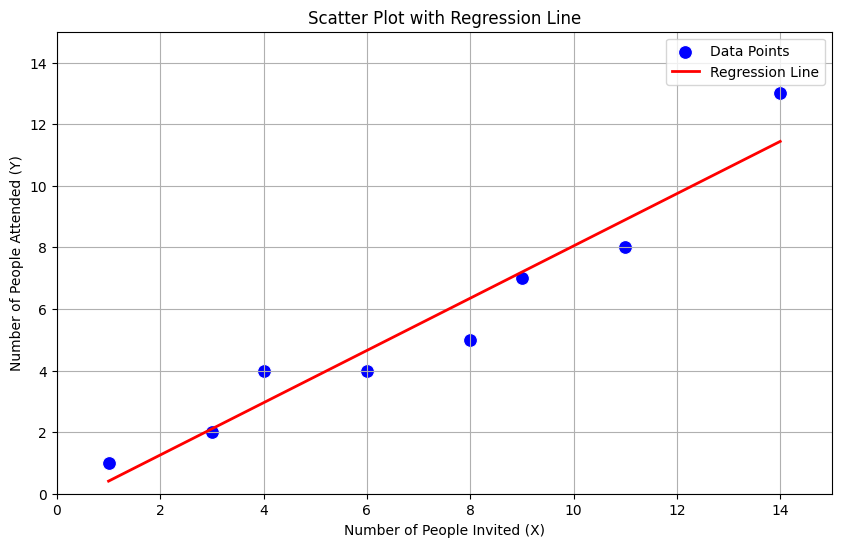

In [14]:
# Creating the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='X', y='Y', data=df, color='blue', s=100, label='Data Points')

# Fit a linear regression model
X = df[['X']]  # Feature
y = df['Y']    # Target
model = LinearRegression()
model.fit(X, y)

# Generate predictions
y_pred = model.predict(X)

# Plot the regression line
plt.plot(df['X'], y_pred, color='red', label='Regression Line', linewidth=2)

# Adding titles and labels
plt.title('Scatter Plot with Regression Line')
plt.xlabel('Number of People Invited (X)')
plt.ylabel('Number of People Attended (Y)')
plt.legend()
plt.grid(True)
plt.xlim(0, 15)
plt.ylim(0, 15)

# Show the plot
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

**Answer:**

- Positive Linear Relationship: The upward trend of the regression line suggests a positive linear relationship between the number of people invited and the number who attend.

- Data Points and Line Fit: Most data points seem to follow the general direction of the regression line. However, there is some variation around the line, indicating that the relationship might not be perfectly linear.

- Potential Outliers: The point at (14, 13) looks like it might be an outlier, as it's a bit far from the general trend seen in the lower number of invites. You might want to explore whether removing it changes the regression results.

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

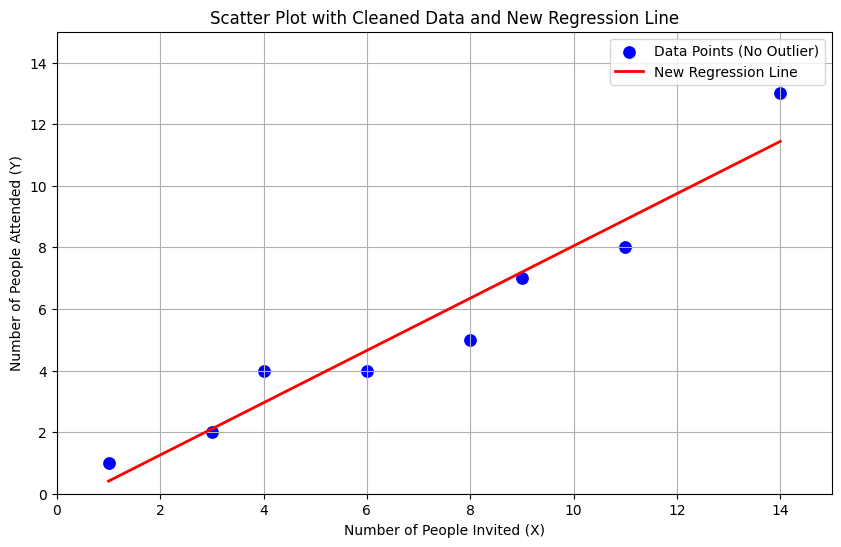

New Intercept (b0): -0.43939393939393945
New Slope (b1): 0.8484848484848485
New R^2 Score: 0.9316696375519905


In [18]:
# Remove the outlier
df_no_outlier = df[~df.isin([[14, 13]]).all(axis=1)]

X_no_outlier = df_no_outlier[['X']]
y_no_outlier = df_no_outlier['Y']
model_no_outlier = LinearRegression()
model_no_outlier.fit(X_no_outlier, y_no_outlier)

# Predict new Y values
y_pred_no_outlier = model_no_outlier.predict(X_no_outlier)

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='X', y='Y', data=df_no_outlier, color='blue', s=100, label='Data Points (No Outlier)')
plt.plot(df_no_outlier['X'], y_pred_no_outlier, color='red', label='New Regression Line', linewidth=2)
plt.title('Scatter Plot with Cleaned Data and New Regression Line')
plt.xlabel('Number of People Invited (X)')
plt.ylabel('Number of People Attended (Y)')
plt.legend()
plt.grid(True)
plt.xlim(0, 15)
plt.ylim(0, 15)
plt.show()

# Print new regression parameters
print("New Intercept (b0):", model_no_outlier.intercept_)
print("New Slope (b1):", model_no_outlier.coef_[0])
print("New R^2 Score:", model_no_outlier.score(X_no_outlier, y_no_outlier))

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

**Answer:**

The form of the data changes significantly without the outlier. With the outlier included, the data appears to have more variability and suggests a weaker linear relationship. Without it, the data forms a clearer linear trend, indicating that the number of attendees increases proportionally with the number of invitations. This improved linear relationship provides a more accurate understanding of the connection between these two variables.

In summary, removing the outlier helps reveal the true pattern in the data and strengthens the confidence in the model’s predictions.